## Bibliotecas

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Base de Dados

In [2]:
head = ['ID', 'Target']
cell_1 = ['Radius-1', 'Texture-1', 'Perimeter-1', 'Area-1', 'Smoothness-1', 'Compactness-1', 'Concavity-1', 'Concave Points-1', 'Symmetry-1', 'Fractal Dimension-1']
cell_2 = ['Radius-2', 'Texture-2', 'Perimeter-2', 'Area-2', 'Smoothness-2', 'Compactness-2', 'Concavity-2', 'Concave Points-2', 'Symmetry-2', 'Fractal Dimension-2']
cell_3 = ['Radius-3', 'Texture-3', 'Perimeter-3', 'Area-3', 'Smoothness-3', 'Compactness-3', 'Concavity-3', 'Concave Points-3', 'Symmetry-3', 'Fractal Dimension-3']

header = head + cell_1 + cell_2 + cell_3

In [3]:
data = pd.read_csv('wdbc.data', names=header)
data.head()

,ID,Target,Radius-1,Texture-1,Perimeter-1,Area-1,Smoothness-1,Compactness-1,Concavity-1,Concave Points-1,...,Radius-3,Texture-3,Perimeter-3,Area-3,Smoothness-3,Compactness-3,Concavity-3,Concave Points-3,Symmetry-3,Fractal Dimension-3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data['Target'] = data['Target'].map({'M': 1, 'B': 0})

## Limpeza da Base de Dados - 3 Células

In [5]:
X = data.drop(head, axis = 1)
y = data['Target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
scale_X_train = scaler.transform(X_train)
scale_X_test = scaler.transform(X_test)

## Métodos de Classificação - 3 Células

In [8]:
_3_cells = {}

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

lr_X_train = scale_X_train
lr_X_test = scale_X_test
lr_y_train = y_train
lr_y_test = y_test

_3_cells['lr'] = {'score': 0, 'solver': ''}

for solver in solvers:
    lr = LogisticRegression(solver= solver, multi_class= 'ovr')
    lr.fit(lr_X_train, lr_y_train)
    lr_pred = lr.predict(lr_X_test)
    score = lr.score(lr_X_test, lr_y_test)
    print ('Solver: ' + solver)
    print('Accuracy Score: {0:.3f}\n'.format(score))
    if score > _3_cells['lr']['score']:
        _3_cells['lr']['score'] = score
        _3_cells['lr']['solver'] = solver

Solver: newton-cg
Accuracy Score: 0.953

Solver: lbfgs
Accuracy Score: 0.953

Solver: liblinear
Accuracy Score: 0.959

Solver: sag
Accuracy Score: 0.953

Solver: saga
Accuracy Score: 0.959



/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/lucas/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [10]:
lr = LogisticRegression(solver= _3_cells['lr']['solver'], multi_class= 'ovr')
lr.fit(lr_X_train, lr_y_train)
lr_pred = lr.predict(lr_X_test)

print(classification_report(lr_y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       110
           1       0.95      0.93      0.94        61

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### Naive Bayes Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB

nbc_X_train = scale_X_train
nbc_X_test = scale_X_test
nbc_y_train = y_train
nbc_y_test = y_test

_3_cells['nbc'] = {'score': 0}

nbc = GaussianNB()
nbc.fit(nbc_X_train, nbc_y_train)
nbc_pred = nbc.predict(nbc_X_test)
score = nbc.score(nbc_X_test, nbc_y_test)
print('Accuracy Score: {0:.3f}'.format(score))
_3_cells['nbc']['score'] = score

Accuracy Score: 0.942


In [12]:
print(classification_report(nbc_y_test,nbc_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       110
           1       0.96      0.87      0.91        61

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



### K-Nearest Neighbors (KNN)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#knn_error_rate = []
knn_score = []

knn_X_train = scale_X_train
knn_X_test = scale_X_test
knn_y_train = y_train
knn_y_test = y_test

_3_cells['knn'] = {'score': 0, 'k': 0}

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(knn_X_train, knn_y_train)
    knn_pred = knn.predict(knn_X_test)
    score = knn.score(knn_X_test, knn_y_test)
    #knn_error_rate.append(np.mean(knn_pred != knn_y_test))
    knn_score.append(score)
    if score > _3_cells['knn']['score']:
        _3_cells['knn']['score'] = score
        _3_cells['knn']['k'] = i

Text(0, 0.5, 'Accuracy Score')

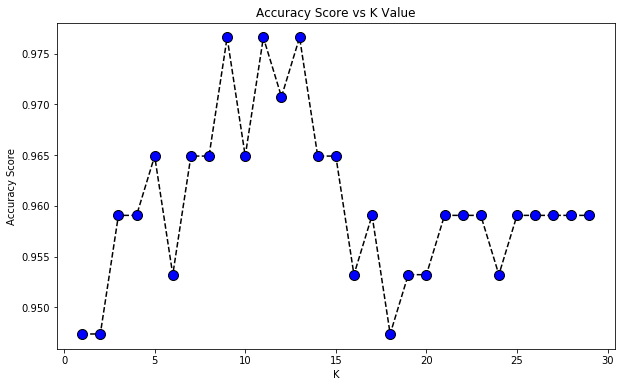

In [14]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 30), knn_score, color = 'black', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Score vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [15]:
print('K: ' + str(_3_cells['knn']['k']))
print('Accuracy Score: {0:.3f}\n'.format(_3_cells['knn']['score']))

K: 9
Accuracy Score: 0.977



In [16]:
knn = KNeighborsClassifier(n_neighbors = _3_cells['knn']['k'])
knn.fit(knn_X_train, knn_y_train)
knn_pred = knn.predict(knn_X_test)

print(classification_report(knn_y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       110
           1       1.00      0.93      0.97        61

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



### Support Vector Machines (SVM)

In [17]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_X_train = scale_X_train
svm_X_test = scale_X_test
svm_y_train = y_train
svm_y_test = y_test

_3_cells['svm'] = {'score': 0, 'kernel': '0'}

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    svm = SVC(kernel = kernel, random_state = 11)
    svm.fit(svm_X_train, svm_y_train)
    svm_pred = svm.predict(svm_X_test)
    score = svm.score(svm_X_test, svm_y_test)
    print ('Kernel: ' + kernel)
    print('Accuracy Score: {0:.3f}\n'.format(score))
    if score > _3_cells['svm']['score']:
        _3_cells['svm']['score'] = score
        _3_cells['svm']['kernel'] = kernel

Kernel: linear
Accuracy Score: 0.953

Kernel: poly
Accuracy Score: 0.883

Kernel: rbf
Accuracy Score: 0.965

Kernel: sigmoid
Accuracy Score: 0.942



In [18]:
svm = SVC(kernel = 'linear', random_state = 11)
svm.fit(svm_X_train, svm_y_train)
svm_pred = svm.predict(svm_X_test)

print(classification_report(svm_y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       110
           1       0.95      0.92      0.93        61

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfc_X_train = scale_X_train
rfc_X_test = scale_X_test
rfc_y_train = y_train
rfc_y_test = y_test

_3_cells['rfc'] = {'score': 0, 'trees': 0, 'leafs': 0}

for i in range(1, 1000, 50):
    for j in range(1, 10):
        rfc = RandomForestClassifier(n_estimators = i, min_samples_leaf = j, random_state = 11)
        rfc.fit(rfc_X_train, rfc_y_train)
        rfc_pred = rfc.predict(rfc_X_test)
        score = rfc.score(rfc_X_test, rfc_y_test)
        if _3_cells['rfc']['score'] < score:
            _3_cells['rfc']['score'] = score
            _3_cells['rfc']['trees'] = i
            _3_cells['rfc']['leafs'] = j
            print('Number of trees: %.2f' % i)
            print('Minimum sample leaf: %.2f' % j)
            print ('Accuracy Score: %.2f\n' % score)

Number of trees: 1.00
Minimum sample leaf: 1.00
Accuracy Score: 0.96

Number of trees: 51.00
Minimum sample leaf: 2.00
Accuracy Score: 0.98



In [20]:
rfc = RandomForestClassifier(n_estimators = _3_cells['rfc']['trees'], min_samples_leaf = _3_cells['rfc']['leafs'], random_state = 11)
rfc.fit(rfc_X_train, rfc_y_train)
rfc_pred = rfc.predict(rfc_X_test)

print(classification_report(rfc_y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       110
           1       0.98      0.95      0.97        61

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## Exportando os Scores

In [21]:
with open('3-Células.txt', 'w') as outfile:
    json.dump(_3_cells, outfile)